### Divident Cut Prediction

This is an initial walkthrough of the data. Model has been built on selected features and results have been analyzed. I have attempted to get the gist of the data through a very high level EDA

As per my understanding Dividend cut predictin is a classification problem. I did not modulate it as a Time-Series problem due to two reasons. The year wise data is not enough to interperate about any seasonal trend. Multivariate analysis would lag accuracy since knowledge of all the features to provide multivariate is crucial.

In the limited timeframe it's not practical to understand all the features. So I will start with limited features then will try to expand the features based on the insight I get in this interpolation.

In [338]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt     # for visualization
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [339]:
df = pd.read_csv('ds_assessment_data_2008_2016.csv')

Glance through the data to get very high level idea

In [340]:
df[:20]

,id,calendar_end,fiscal_year_end_year,Dividend,Dividend_returns,ASSETS,BFNG,BPS,BPS_TANG,CAPEX,...,S_M_EXP_returns,EBITDAR_returns,REV_TOT_returns,EPSRD_returns,payout_ratio,earnings_cover,cashflow_cover,debt_factor,profitability,financial_health_score
0,c141,2010-12-31,2010,10.800,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.263415,3.796296,NaN,NaN,0.003902,1.0
1,c141,2011-12-31,2011,11.400,0.055556,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.104779,9.543860,NaN,NaN,0.007134,1.0
2,c141,2012-12-31,2012,12.400,0.087719,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.094946,10.532258,NaN,NaN,0.002238,1.0
3,c141,2013-12-31,2013,13.200,0.064516,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,c141,2014-12-31,2014,17.600,0.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,c141,2015-12-31,2015,17.600,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,c141,2016-12-31,2016,17.600,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,c142,2014-12-31,2014,68.750,NaN,0.056086,0.096204,NaN,NaN,0.070300,...,NaN,NaN,NaN,NaN,0.723684,1.381818,2.149818,NaN,0.123614,2.0
8,c142,2015-12-31,2015,75.450,0.097455,0.057990,0.071493,NaN,NaN,0.048667,...,NaN,NaN,NaN,NaN,0.922852,1.083597,1.985421,NaN,0.092953,2.0
9,c142,2016-12-31,2016,52.200,-0.308151,0.053828,NaN,NaN,NaN,0.020825,...,NaN,NaN,NaN,NaN,0.839228,1.191571,NaN,NaN,0.096288,1.0


In [341]:
data = df.copy()

In [342]:
data.columns

Index(['id', 'calendar_end', 'fiscal_year_end_year', 'Dividend',
       'Dividend_returns', 'ASSETS', 'BFNG', 'BPS', 'BPS_TANG', 'CAPEX',
       ...
       'S_M_EXP_returns', 'EBITDAR_returns', 'REV_TOT_returns',
       'EPSRD_returns', 'payout_ratio', 'earnings_cover', 'cashflow_cover',
       'debt_factor', 'profitability', 'financial_health_score'],
      dtype='object', length=107)

We have 107 given features. I selected 11 columns to get started.

In [343]:
t_col = ['id','calendar_end','fiscal_year_end_year','Dividend','Dividend_returns','SALES','EPS','payout_ratio','debt_factor','profitability','financial_health_score']

In [344]:
c_data = data[t_col]

In [345]:
c_data.shape

(856, 11)

Get stats of the chosen features

In [346]:
c_data.describe()

,fiscal_year_end_year,Dividend,Dividend_returns,SALES,EPS,payout_ratio,debt_factor,profitability,financial_health_score
count,856.000000,856.000000,740.000000,796.000000,786.000000,786.000000,671.000000,792.000000,856.000000
mean,2012.697430,29.527885,inf,0.327609,0.660472,inf,3.280656,0.108912,1.670561
std,2.464872,43.553085,NaN,1.037656,1.044244,NaN,11.489780,0.393163,1.090683
min,2008.000000,0.000000,-1.000000,-0.000134,-10.368494,-68.444444,-18.243999,-5.118467,0.000000
25%,2011.000000,7.200000,0.000000,0.007815,0.171747,0.067002,0.651154,0.005938,1.000000
50%,2013.000000,20.000000,0.053841,0.041257,0.482567,0.387056,2.254599,0.065252,2.000000
75%,2015.000000,40.641355,0.195554,0.179086,0.966810,1.143487,4.123907,0.190305,3.000000
max,2016.000000,440.000000,inf,9.674043,6.702323,inf,192.763354,1.636849,3.000000


We should device interpolate NaNs and inf. What I produce hereby is result of many interpolation. I am just putting some of the EDA work which I think gets close to actual data.

In [347]:
t_data = c_data.groupby('id').filter(lambda x: x.shape[0] >2)

In [348]:
#t_data=c_data.copy()

In [349]:
t_data.shape

(844, 11)

 I now create a label for prediction "div_cut". It has 1 and 0 values. 0 means no cut and 1 means there is chances for cut. I have chosen the current value of dividend_return 0.095 for predicting cut in future. I have tried some other numbers as well. What I am putting here is pieces of strategy to I believed getting close to descent prediction

In [350]:
t_data['div_cut']=0

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [351]:
t_data['Dividend_returns'] = t_data['Dividend_returns'].fillna(0)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [352]:
t_data['div_cut'] = t_data['Dividend_returns'].apply(lambda x: 0 if x>=0.095 else 1)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [353]:
#data = t_data.loc[:,['fiscal_year_end_year','SALES','EPS','payout_ratio','debt_factor','profitability','financial_health_score','div_cut']]

In [354]:
t_data.isnull().sum()

id                          0
calendar_end                0
fiscal_year_end_year        0
Dividend                    0
Dividend_returns            0
SALES                      60
EPS                        70
payout_ratio               70
debt_factor               182
profitability              64
financial_health_score      0
div_cut                     0
dtype: int64

In [355]:
t_data['debt_factor'] = t_data.groupby('id')['debt_factor'].apply(lambda x:x.interpolate(method='linear', limit_direction ='both'))

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [356]:
t_data.head()

,id,calendar_end,fiscal_year_end_year,Dividend,Dividend_returns,SALES,EPS,payout_ratio,debt_factor,profitability,financial_health_score,div_cut
0,c141,2010-12-31,2010,10.8,0.000000,0.043991,0.686988,0.263415,NaN,0.003902,1.0,1
1,c141,2011-12-31,2011,11.4,0.055556,0.063927,1.823032,0.104779,NaN,0.007134,1.0,1
2,c141,2012-12-31,2012,12.4,0.087719,0.067240,2.188308,0.094946,NaN,0.002238,1.0,1
3,c141,2013-12-31,2013,13.2,0.064516,NaN,NaN,NaN,NaN,NaN,0.0,1
4,c141,2014-12-31,2014,17.6,0.333333,NaN,NaN,NaN,NaN,NaN,0.0,0


In [357]:
data = t_data.dropna()

### Dropping all the NANs and inf without interpolation since we wont miss much data

In [358]:
data.shape

(748, 12)

In [359]:
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

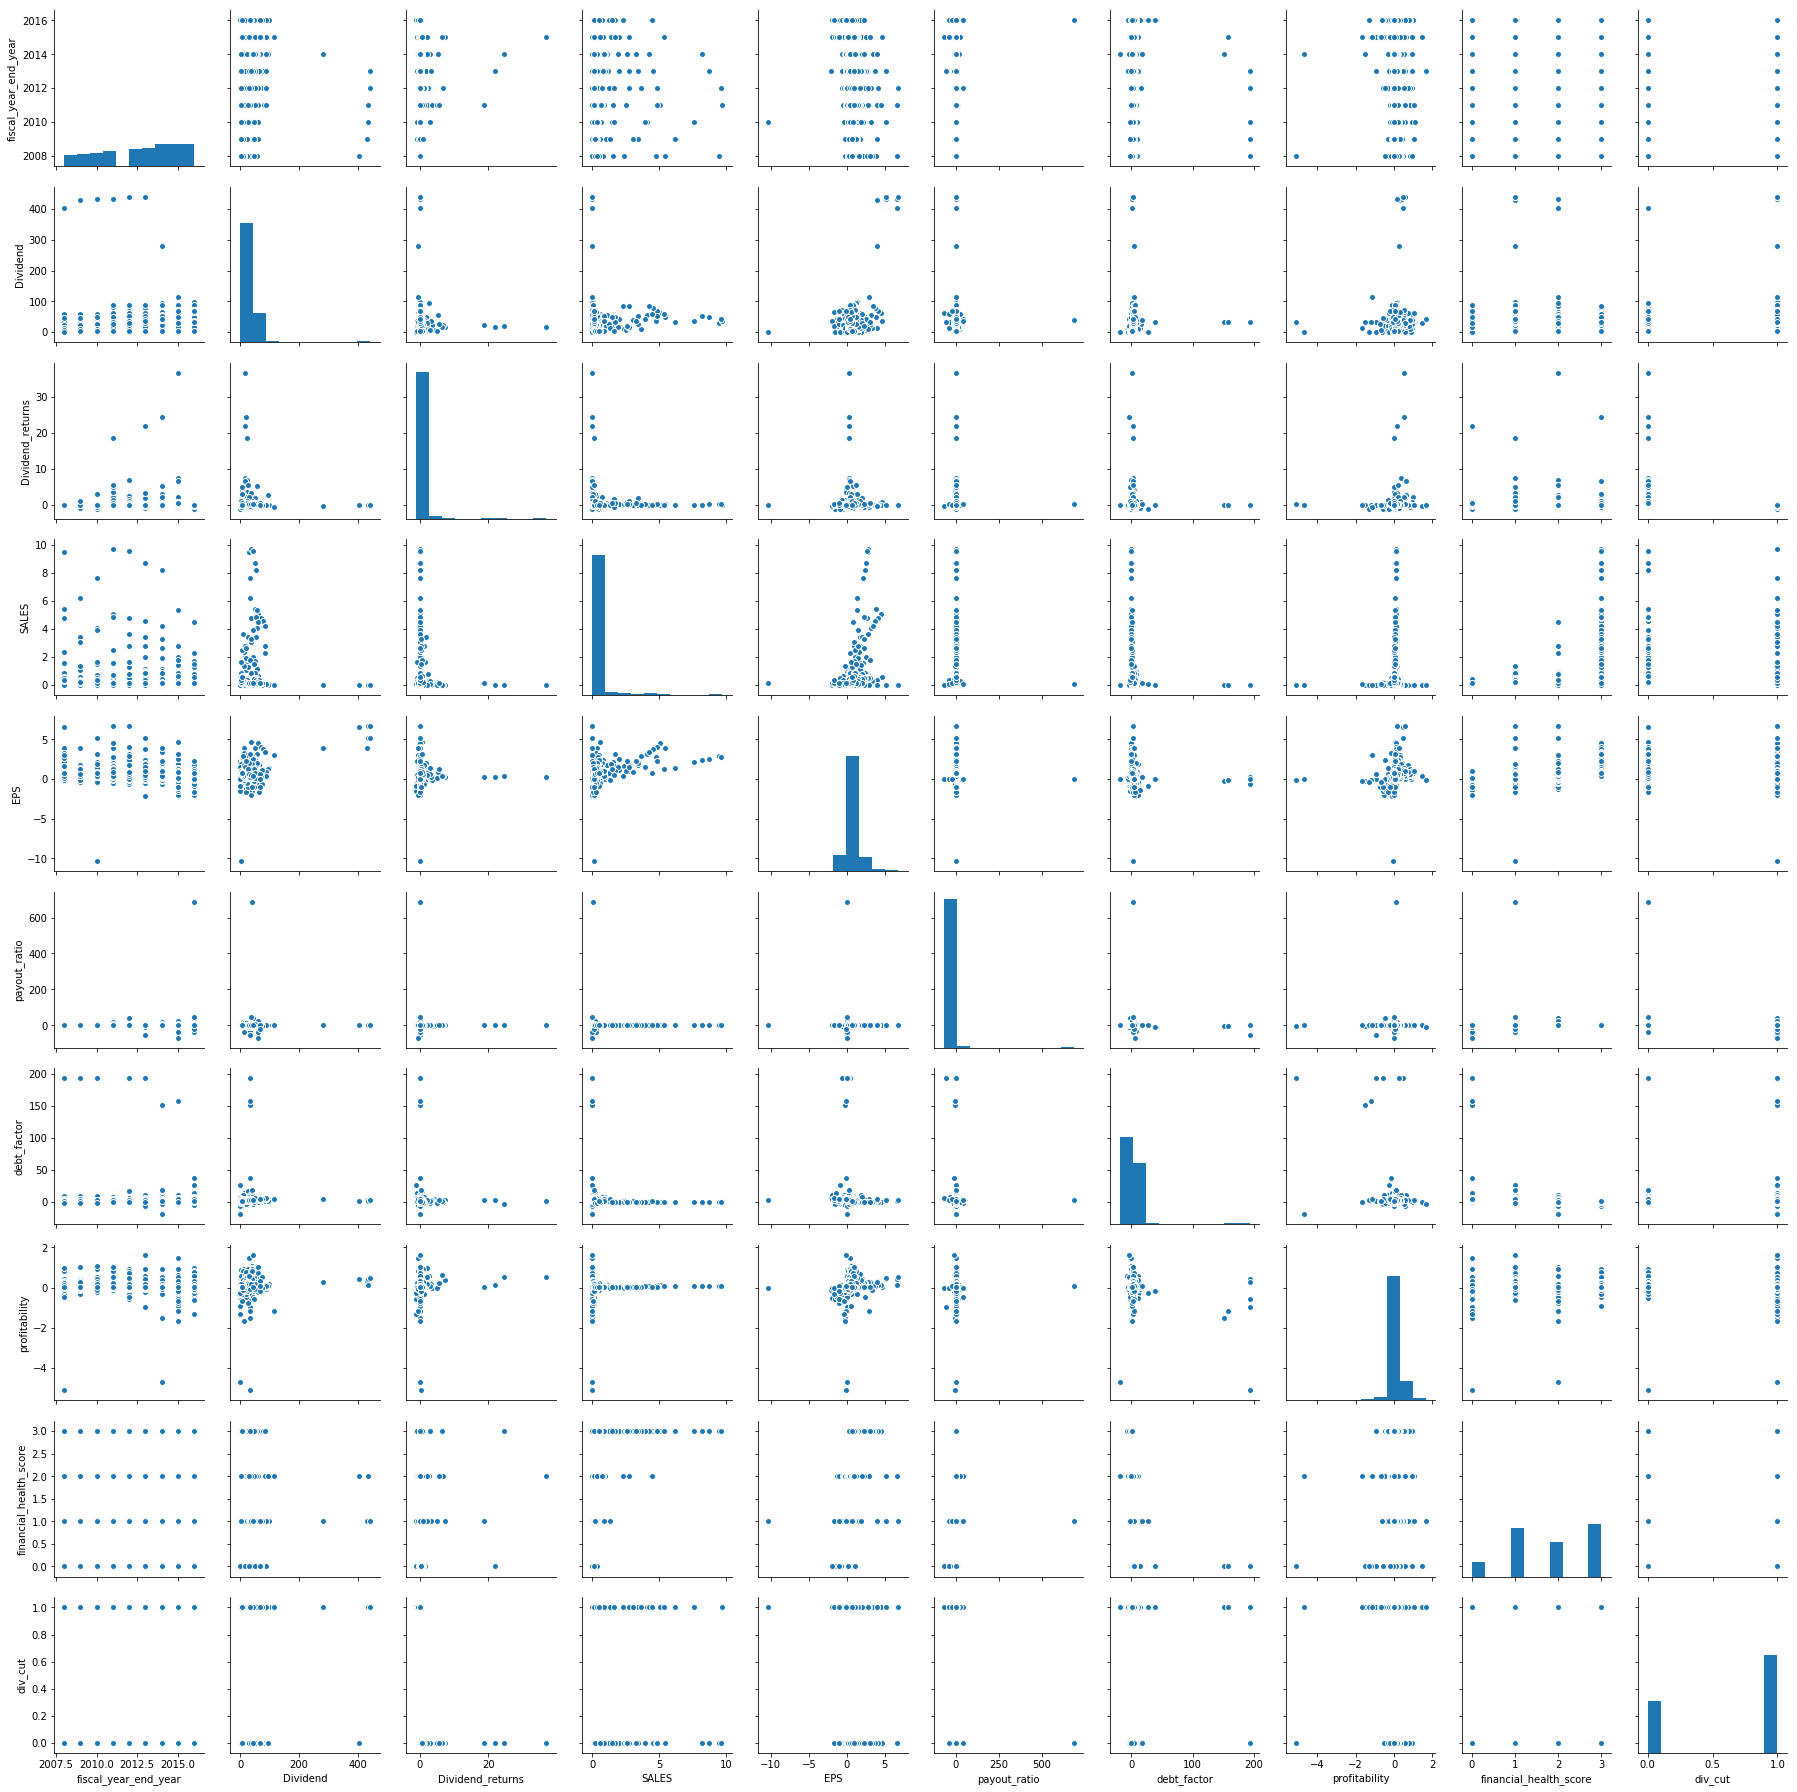

In [360]:
sns.pairplot(data)

As we can see there are many outliears in the data which may try to overfit the model. For the same of simplicity I am ignoring the outliears. I will take care of these in next updated version

In [361]:
data.describe()

,fiscal_year_end_year,Dividend,Dividend_returns,SALES,EPS,payout_ratio,debt_factor,profitability,financial_health_score,div_cut
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,2012.632653,29.284901,0.319982,0.352257,0.654042,1.407150,4.213405,0.098310,1.836735,0.653061
std,2.477368,43.318492,2.064958,1.075911,1.050916,25.818882,17.780848,0.392190,1.016491,0.476320
min,2008.000000,0.000000,-1.000000,-0.000134,-10.368494,-68.444444,-18.243999,-5.118467,0.000000,0.000000
25%,2011.000000,7.546000,0.000000,0.011017,0.174260,0.064988,0.576051,0.005646,1.000000,0.000000
50%,2013.000000,20.750000,0.038270,0.045816,0.485918,0.382166,2.165334,0.061077,2.000000,1.000000
75%,2015.000000,41.550000,0.161382,0.200569,0.954905,1.169360,4.181650,0.180966,3.000000,1.000000
max,2016.000000,440.000000,36.647059,9.674043,6.702323,686.042582,192.763354,1.636849,3.000000,1.000000


We need to rescale the data with a scaler. I am using RobustScaler since it’s more suitable for when there are outliers in the data.

In [362]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()

## Scale all the feature except financial_health_score to standardize

In [363]:
#scaler = StandardScaler()

In [364]:
data[['SALES','EPS','payout_ratio','debt_factor','profitability']]=scaler.fit_transform(data.loc[:,['SALES','EPS','payout_ratio','debt_factor','profitability']])

In [365]:
data.head()

,id,calendar_end,fiscal_year_end_year,Dividend,Dividend_returns,SALES,EPS,payout_ratio,debt_factor,profitability,financial_health_score,div_cut
10,c143,2011-12-31,2011,36.275,0.000000,-0.048280,1.122571,0.057971,-0.389684,0.589404,3.0,1
11,c143,2012-12-31,2012,41.625,0.147484,-0.028268,0.691143,0.269820,-0.334831,0.592514,2.0,0
12,c143,2013-12-31,2013,45.650,0.096697,-0.010299,0.935833,0.223314,-0.279978,0.669241,3.0,0
13,c143,2014-12-31,2014,49.450,0.083242,-0.000315,1.425214,0.123308,-0.294400,0.884337,2.0,1
14,c143,2015-12-31,2015,53.250,0.076845,-0.003147,0.283326,0.796545,-0.308822,0.614305,2.0,1


In [366]:
#sns.pairplot(data)

There are some outliers but we are ignoring them as of now. We are just trying to get a picture of how datset fares with model

Keep all the data till 2015 as training and 2016 data to test

In [367]:
def  process_data(data):
    test_data = data[data['fiscal_year_end_year']==2016]
    train_data = data[data['fiscal_year_end_year']!=2016]
    
    train_data = train_data.drop('fiscal_year_end_year',axis=1)
    test_data = test_data.drop('fiscal_year_end_year',axis=1)
    
    X_train = train_data.drop('div_cut',axis=1)
    X_test = test_data.drop('div_cut',axis=1)
    
    y_train = train_data['div_cut']
    y_test = test_data['div_cut']
    
    return X_train,y_train,X_test,y_test

In [368]:
#f_data = data[data['financial_health_score']==3.0]
#X_train,y_train,X_test,y_test = process_data(f_data)

Dropping off the features that are irrelevant or that may affect the result

In [369]:
data = data.drop(['id','calendar_end','Dividend','Dividend_returns'],axis=1)

In [370]:
X_train,y_train,X_test,y_test = process_data(data)

In [371]:
#X_test

## Create an MLP using SKLearn for training and test. Using default parameters and three hidde layers

In [372]:
def neural_nets(X_train, X_test, y_train, y_test):
    
    clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100,))

    clf.fit(X_train, y_train)
    print("Score: ", clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    print("F1 score is: {}".format(f1_score(y_test, y_pred)))
    print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba)))
    
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    acc = clf.score(X_test, y_test)
    return f1,auc,acc


## Create a Random-Forrest model

In [373]:
def randomForest(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_depth=4, n_estimators=3)
    # clf = GridSearchCV(alg, parameters, n_jobs=4)
    clf.fit(X_train, y_train)
    print("Score: ", clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    print("F1 score is: {}".format(f1_score(y_test, y_pred)))
    print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba)))
    
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    acc = clf.score(X_test, y_test)
    return f1,auc,acc


## Create a Logistic Regression classifier with default hyperparameters

In [374]:
def logistic_regression(X_train, X_test, y_train, y_test):
    
    clf = LogisticRegression(C=1e5)
    clf.fit(X_train, y_train)

    print("Score: ", clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    print("F1 score is: {}".format(f1_score(y_test, y_pred)))
    print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba)))
    
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    acc = clf.score(X_test, y_test)
    return f1,auc,acc


## Create a Logistic with smote classifier with default hyperparameters

In [375]:
def logistic_with_smote(X_train, X_test, y_train, y_test):
    
    clf = LogisticRegression(C=1e5)
    clf.fit(X_train, y_train)
    # build model with SMOTE imblearn
    smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), clf)

    smote_model = smote_pipeline.fit(X_train, y_train)
    smote_prediction = smote_model.predict(X_test)
    smote_prediction_proba = smote_model.predict_proba(X_test)[:, 1]

    print(classification_report_imbalanced(y_test, smote_prediction))
    print('SMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))
    print("SMOTE AUC score: ", roc_auc_score(y_test, smote_prediction_proba))
    print("SMOTE F1 Score: ", f1_score(y_test, smote_prediction))
    
    acc=smote_pipeline.score(X_test, y_test)
    f1 = f1_score(y_test, smote_prediction)
    auc = roc_auc_score(y_test, smote_prediction_proba)
    
    return f1,auc,acc


## Create a xgb_classifier classifier with some specific hyperparameters

In [376]:
def xgb_classifier(X_train, X_test, y_train, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    alg = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    alg.fit(X_train, y_train, eval_metric='auc')

    predictions = alg.predict(X_test)
    pred_proba = alg.predict_proba(X_test)[:, 1]

    print("Accuracy : %.4g" % metrics.accuracy_score(y_test, predictions))
    print("AUC: %f" % metrics.roc_auc_score(y_test, pred_proba))
    print("F1 Score: %f" % metrics.f1_score(y_test, predictions))

    acc=metrics.accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc = roc_auc_score(y_test, pred_proba)
    
    return f1,auc,acc


In [377]:
Algo, AUC, F1, Accuracy =[],[],[],[]

Algo.append('Neural Nets')
f,a,acc = neural_nets(X_train, X_test, y_train, y_test)
AUC.append(a)
F1.append(f)
Accuracy.append(acc)


Algo.append('Random Forrest')
f,a,acc =randomForest(X_train, X_test, y_train, y_test)
AUC.append(a)
F1.append(f)
Accuracy.append(acc)

Algo.append('Logistic Regression')
f,a,acc = logistic_regression(X_train, X_test, y_train, y_test)
AUC.append(a)
F1.append(f)
Accuracy.append(acc)

Algo.append('Logistic wih Smote')
f,a,acc = logistic_with_smote(X_train, X_test, y_train, y_test)
AUC.append(a)
F1.append(f)
Accuracy.append(acc)

Algo.append('XGB')
f,a,acc = xgb_classifier(X_train, X_test, y_train, y_test)
AUC.append(a)
F1.append(f)
Accuracy.append(acc)

Results = pd.DataFrame({'Algo':Algo,'Accuracy':Accuracy,'AUC':AUC,'F1 Score':F1})

Score:  0.780952380952381
F1 score is: 0.8588957055214724
AUC Score is: 0.721
Score:  0.780952380952381
F1 score is: 0.863905325443787
AUC Score is: 0.7589999999999999
Score:  0.7714285714285715
F1 score is: 0.8695652173913044
AUC Score is: 0.776
                   pre       rec       spe        f1       geo       iba       sup

          0       0.56      0.36      0.91      0.44      0.57      0.31        25
          1       0.82      0.91      0.36      0.86      0.57      0.35        80

avg / total       0.76      0.78      0.49      0.76      0.57      0.34       105

SMOTE Pipeline Score 0.780952380952381
SMOTE AUC score:  0.814
SMOTE F1 Score:  0.863905325443787


C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy : 0.7524
AUC: 0.832000
F1 Score: 0.837500


In [378]:
Results

,Algo,Accuracy,AUC,F1 Score
0,Neural Nets,0.780952,0.721,0.858896
1,Random Forrest,0.780952,0.759,0.863905
2,Logistic Regression,0.771429,0.776,0.869565
3,Logistic wih Smote,0.780952,0.814,0.863905
4,XGB,0.752381,0.832,0.837500


In most of the model I have used only default hyperparameters which is fine as of now. As per the results Logistic with smote is giving food results. As per my observation the data was unbalanced to one side i.e we have more data of one type than other hence F1 score can provide a better picture since it take care of both precision as well as Recall. Also combining result with AUC gives us better idea.

Going further we will try to get rid of outliers and try to predict with more cleaner data. We will also try to tune hyperparameters to get better outcome from different models. We also have option to try with different models but because of time-constraint I will work with these model and try to get best of it.